In [1]:
import cv2
import pillow_heif

from PIL import Image
from PIL.ExifTags import TAGS

In [2]:
import os
from collections import Counter
from typing import Tuple

import pandas as pd
import numpy as np

from tqdm.auto import tqdm
tqdm.pandas()

C:\Users\_v010ch_\Anaconda3\envs\uly22\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#import seaborn as sns

In [4]:
import matplotlib

In [5]:
#!pip list

In [6]:
DIR_DATA = os.path.join(os.getcwd(), 'data')
DIR_DATA_TRAIN = os.path.join(DIR_DATA, 'train')
DIR_DATA_TEST  = os.path.join(DIR_DATA, 'test')

In [7]:
def open_img(inp_path: str) -> np.ndarray:
    
    if inp_path.endswith('.jpg'):
        ret_img = cv2.imread(inp_path)
    else:
        if pillow_heif.is_supported(inp_path):
            heif_file = pillow_heif.open_heif(inp_path, convert_hdr_to_8bit=False)
            #print("image mode:", heif_file.mode)
            #print("image data length:", len(heif_file.data))
            #print("image data stride:", heif_file.stride)
            if heif_file.has_alpha:
                heif_file.convert_to("BGRA;16")
            else:
                heif_file.convert_to("BGR;16")  # convert 10 bit image to RGB 16 bit.
            #print("image mode:", heif_file.mode)
            ret_img = np.asarray(heif_file)
    
    return ret_img

## Загрузка данных

In [8]:
train_list = os.listdir(DIR_DATA_TRAIN)
test_list  = os.listdir(DIR_DATA_TEST)

train_heic = [el for el in train_list if el.endswith('.heic')]
test_heic  = [el for el in test_list  if el.endswith('.heic')]

train_jpg = [el for el in train_list if el.endswith('.jpg')]
test_jpg  = [el for el in test_list if el.endswith('.jpg')]

fnames_train = set([el.split('.')[0] for el in train_list])
fnames_test  = set([el.split('.')[0] for el in test_list])

In [9]:
#print(Counter([el.split('.')[1] for el in train_list]))
#print(Counter([el.split('.')[1] for el in test_list]))

In [10]:
train_df = pd.read_csv(os.path.join(DIR_DATA, 'train.csv'), delimiter = ';')
train_df.shape

(530, 2)

In [11]:
train_df.head()

,image_name,distance
0,img_1596.jpg,4.88
1,img_1600.jpg,1.54
2,img_1601.jpg,3.68
3,img_1603.jpg,2.22
4,img_1605.jpg,3.73


In [12]:
train_df.groupby('image_name').agg('size').value_counts()

1    530
dtype: int64

Посмотрим на размеры

Посмотрим на мин и макс

In [15]:
train_df.distance.nlargest(5)

91     9.38
260    9.06
80     8.80
90     8.78
368    8.74
Name: distance, dtype: float64

In [16]:
train_df.distance.nsmallest(5)

480    0.85
124    1.06
479    1.09
19     1.12
199    1.16
Name: distance, dtype: float64

In [17]:
print('min ', train_df.distance[train_df.distance.argmin()], '  ', train_df.image_name[train_df.distance.argmin()])
print('max ', train_df.distance[train_df.distance.argmax()], '  ', train_df.image_name[train_df.distance.argmax()])

min  0.85    img_2858.jpg
max  9.38    img_2724.heic


In [18]:
#img = open_img(os.path.join(DIR_DATA_TRAIN, train_df.image_name[train_df.distance.argmin()]))
img = open_img(os.path.join(DIR_DATA_TRAIN, train_df.image_name[train_df.distance.argmax()]))
#img = cv2.resize(img, [504*4, 504*3])
img = cv2.resize(img, [252*4, 252*3])
cv2.imshow('random', img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [19]:
train_df['ext'] = train_df.image_name.apply(lambda x: x.split('.')[1])

<AxesSubplot:>

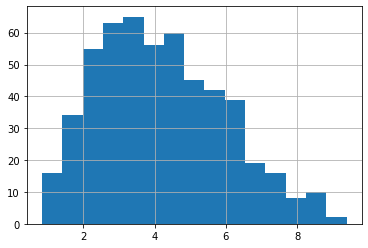

In [20]:
train_df.distance.hist(bins = 15)

In [21]:
# 520 x 112
# 245 x 160
# 290 х 170

Посмотрим пересечение датасетов

In [22]:
tmp = list(fnames_train.intersection(fnames_test))
len(tmp)

44

In [ ]:
for idx, el in enumerate(tmp):
    if os.path.exists(os.path.join(DIR_DATA_TRAIN, f'{el}.jpg')):
        img_train = open_img(os.path.join(DIR_DATA_TRAIN, f'{el}.jpg'))
    else:
        img_train = open_img(os.path.join(DIR_DATA_TRAIN, f'{el}.heic'))
        
    if os.path.exists(os.path.join(DIR_DATA_TEST, f'{el}.jpg')):
        img_test = open_img(os.path.join(DIR_DATA_TEST, f'{el}.jpg'))
    else:
        img_test = open_img(os.path.join(DIR_DATA_TEST, f'{el}.heic'))
        
    img_train = cv2.resize(img_train, [252*4, 252*3])
    img_test  = cv2.resize(img_test, [252*4, 252*3])

    img = np.concatenate((img_train, img_test), axis = 1)
    
    cv2.imshow(f'{idx}   {el}', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()     
    

Смазанные фото

In [ ]:
#for el in train_heic:
for el in test_heic:
    #img = open_img(os.path.join(DIR_DATA_TRAIN, el))
    img = open_img(os.path.join(DIR_DATA_TEST, el))
    img = cv2.resize(img, [252*4, 252*3])

    cv2.imshow(f'motion blur {el}', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 

In [ ]:
motion_blur_train = ['img_2709.heic', 'img_2733.heic', 'img_2734.heic']    # 'img_2734.heic' возможно рабочий 
motion_blur_test  = ['img_2674.heic']

In [ ]:
img = open_img(os.path.join(DIR_DATA_TRAIN, 'img_2745.heic'))
#img = open_img(os.path.join(DIR_DATA_TEST, motion_blur_test[0]))
img = cv2.resize(img, [252*4, 252*3])
               
cv2.imshow('motion blur', img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

Проверим метеданные фотографий

In [44]:
# open the image
image = Image.open(os.path.join(DIR_DATA_TRAIN, train_jpg[0]))
  
# extracting the exif metadata
exifdata = image.getexif()
  
# looping through all the tags present in exifdata
for tagid in exifdata:
      
    # getting the tag name instead of tag id
    tagname = TAGS.get(tagid, tagid)
  
    # passing the tagid to get its respective value
    value = exifdata.get(tagid)
    
    # printing the final result
    print(f"{tagname:25}: {value}")

GPSInfo                  : 2192
ResolutionUnit           : 2
ExifOffset               : 226
Make                     : Apple
Model                    : iPhone 11
Software                 : 15.5
Orientation              : 1
DateTime                 : 2022:07:07 11:02:48
YCbCrPositioning         : 1
XResolution              : 72.0
YResolution              : 72.0
HostComputer             : iPhone 11


In [438]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.classes = [0, 2]  # person and car

_ = model.cpu()

Using cache found in C:\Users\_v010ch_/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-3 Python-3.10.4 torch-1.12.0 CUDA:0 (GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [439]:
# motion blur img_2733.heic, img_2734.heic
# nearest img_2858.jpg
# several cars img_2896.jpg, img_2885.jpg, !! img_2674.jpg, img_2660.jpg
# part closed img_2723.jpg
# left first img_2694.jpg
# car by side img_2418.jpg, 
# construction on the roof img_1832.jpg
# double car img_1621.jpg


# !!!TEST with strange number

# 'x_min', 'y_min', 'x_max', 'y_max', 'conf', 'class'

In [440]:
#img = open_img(os.path.join(DIR_DATA_TRAIN, 'img_2733.heic'))
img = open_img(os.path.join(DIR_DATA_TRAIN, 'img_2674.jpg'))
#results = model(np.array(img))
results = model(img)

In [441]:
def get_car_center(inp_tensor: torch.Tensor) -> Tuple[int, int]:
    
    #car_cntr = (int((inp_tensor.xyxy[0][el][2].int().item() - inp_tensor.xyxy[0][el][0].int().item())/2 + inp_tensor.xyxy[0][el][0].int().item()),
    #            int((inp_tensor.xyxy[0][el][3].int().item() - inp_tensor.xyxy[0][el][1].int().item())/2 + inp_tensor.xyxy[0][el][1].int().item())
    #    )

    car_cntr = (int((inp_tensor[2].int().item() - inp_tensor[0].int().item())/2 + inp_tensor[0].int().item()),
                int((inp_tensor[3].int().item() - inp_tensor[1].int().item())/2 + inp_tensor[1].int().item())
        )
    
    return car_cntr

In [442]:
def get_center_dist(inp_center: Tuple[int, int], inp_point: Tuple[int, int]) -> float:
    
    return np.sqrt((inp_center[0] - inp_point[0])**2 + \
                   (inp_center[1] - inp_point[1])**2)

In [443]:
def determine_targ_car(inp_results, inp_img_cntr) -> int:
    
    min = 1000000

    for el in range(inp_results.xyxy[0].shape[0]):
        car_cntr = get_car_center(inp_results.xyxy[0][el])
        cur_dist = get_center_dist(inp_img_cntr, car_cntr)
        if cur_dist < min:
            min = cur_dist
            min_idx = el

    #print(min_idx)
    return min_idx

In [444]:
img_cntr = (int(img.shape[1]/2), int(img.shape[0]/2))
target_goal = determine_targ_car(results, img_cntr)

4


In [445]:
cv2.circle(img, img_cntr, 10, (0, 0, 255), 20)
cv2.rectangle(img, 
              (results.xyxy[0][target_goal][0].int().item(), results.xyxy[0][target_goal][1].int().item()), 
             (results.xyxy[0][target_goal][2].int().item(), results.xyxy[0][target_goal][3].int().item()), 
             (255,0,0), 2)
#image = cv.circle(image, centerOfCircle, radius, color, thickness)
car_cntr = get_car_center(results.xyxy[0][target_goal])
_ = cv2.circle(img, car_cntr, 10, (255, 0, 0), 20)

In [446]:
img = cv2.resize(img, [252*4, 252*3])
               
cv2.imshow('motion blur', img)
cv2.waitKey(0)
cv2.destroyAllWindows() 